# Exploratory Data Analysis of Stimulus Triggered Averages
*Ian Malone*

### Load data and check structure

In [1]:
import pandas as pd

project = 'NEIL'

#path = 'D:\\Data\\df_STA_%s_2020_12_14.csv' % project
path = 'D:\\Data\\df_STA_%s_2021_01_07.csv' % project

df_sta = pd.read_csv(path)
df_sta.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Sample,STA_Amplitude
0,N01,999,1,Left,10.0,0,0.019782
1,N01,999,1,Left,10.0,1,0.015173
2,N01,999,1,Left,10.0,2,0.020359
3,N01,999,1,Left,10.0,3,0.019855
4,N01,999,1,Left,10.0,4,0.018697


#### For this analysis, we will only keep the right side EMG for SPARC and left side EMG for Neilsen (for now)

In [2]:
if 'NEIL' in path: 
    df_sta = df_sta[df_sta["Side"] == 'Left']
else:
    df_sta = df_sta[df_sta["Side"] == 'Right']

In [3]:
print(df_sta.Animal.unique())
print(df_sta.Day_Postop.unique())
print(df_sta.Day_Stim.unique())
print(df_sta.Side.unique())
print(df_sta.Stim_Amplitude.unique())

['N01' 'N04' 'N05' 'N09' 'N10' 'N11' 'N13' 'N14' 'N15' 'N16' 'N17' 'N19'
 'N20' 'N21' 'N22' 'N23' 'N24' 'N25' 'N26' 'N27' 'N28' 'N29' 'N30' 'N31'
 'N32' 'N33']
[999   2   3   4   5   6   1]
[1 2 3 4 0]
['Left']
[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270. 280.
 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410. 420.
 430. 440. 450. 490. 460. 470. 480. 500. 510. 520. 530. 540. 550. 560.
 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690. 700.
 710. 720. 730. 740. 750. 760. 770. 780. 790. 800. 810. 820. 830. 840.
 850. 860. 870. 880. 890. 900. 910.  15.  25.  35.  45.  55.  65.  75.
  85.  95. 105. 115. 125. 135. 145. 155. 165. 175. 185. 195. 205. 215.
 225. 235. 245. 255. 265. 275. 285. 295. 305. 315. 325. 335. 345. 355.
 365. 375. 385. 395. 405. 415. 425. 435. 445. 455. 575. 735. 685.]


In [4]:
df_sta.groupby(['Animal'])['Day_Stim'].unique()

Animal
N01       [1, 2, 3, 4]
N04          [1, 2, 4]
N05          [1, 2, 4]
N09       [1, 2, 3, 4]
N10       [1, 2, 3, 4]
N11       [1, 2, 3, 4]
N13       [1, 2, 3, 4]
N14       [1, 2, 3, 4]
N15       [1, 2, 3, 4]
N16       [1, 2, 3, 4]
N17       [1, 2, 3, 4]
N19       [1, 2, 3, 4]
N20       [1, 2, 3, 4]
N21       [1, 2, 3, 4]
N22       [1, 2, 3, 4]
N23       [1, 2, 3, 4]
N24       [1, 2, 3, 4]
N25       [1, 2, 3, 4]
N26       [1, 2, 3, 4]
N27    [0, 1, 2, 3, 4]
N28    [0, 1, 2, 3, 4]
N29    [0, 1, 2, 3, 4]
N30    [0, 1, 2, 3, 4]
N31    [0, 1, 2, 3, 4]
N32    [0, 1, 2, 3, 4]
N33    [0, 1, 2, 3, 4]
Name: Day_Stim, dtype: object

### Plot stimulus triggered average waveforms
##### For each current amplitude, each animal, and each day
There is a lot of data here, so we will subset. We also need to remove the stimulus artifact.

In [5]:
sampling_frequency = 5000 # hertz
df_sta['Time'] = df_sta['Sample']/sampling_frequency # create time column based on samples and sampling frequency
df_sta['Time'] = df_sta['Time']*1000
df_sta.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Sample,STA_Amplitude,Time
0,N01,999,1,Left,10.0,0,0.019782,0.0
1,N01,999,1,Left,10.0,1,0.015173,0.2
2,N01,999,1,Left,10.0,2,0.020359,0.4
3,N01,999,1,Left,10.0,3,0.019855,0.6
4,N01,999,1,Left,10.0,4,0.018697,0.8


In [6]:
df_sta_sub = df_sta.copy()
df_sta_sub = df_sta_sub[(df_sta_sub["Stim_Amplitude"] % 50) == 0] # keep only stimulus amplitudes divisible by 50
"Unique stimulation amplitudes after subsetting are %s uA." % (df_sta_sub.Stim_Amplitude.unique())

'Unique stimulation amplitudes after subsetting are [ 50. 100. 150. 200. 250. 300. 350. 400. 450. 500. 550. 600. 650. 700.\n 750. 800. 850. 900.] uA.'

###### The plot below is the raw STA data before any processing

In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set(font_scale=1)
# plt.figure(figsize=(20,12))

# g = sns.FacetGrid(df_sta_sub, col='Day_Stim', row='Animal', hue='Stim_Amplitude')
# g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude')
# g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
# g.add_legend()
# #plt.savefig('C:\\Users\\Ian\\Downloads\\saving-a-seaborn-plot-as-pdf-file.pdf')


In [8]:
# remove the stimulus artifact
df_sta_noart = df_sta.copy()
df_sta_noart = df_sta_noart[df_sta_noart['Sample'] >= 11]

df_sta_sub_noart = df_sta_sub.copy()
df_sta_sub_noart = df_sta_sub_noart[df_sta_sub_noart['Sample'] >= 11]

###### The plot below shows the normalized STAs with stimulus artifact removed

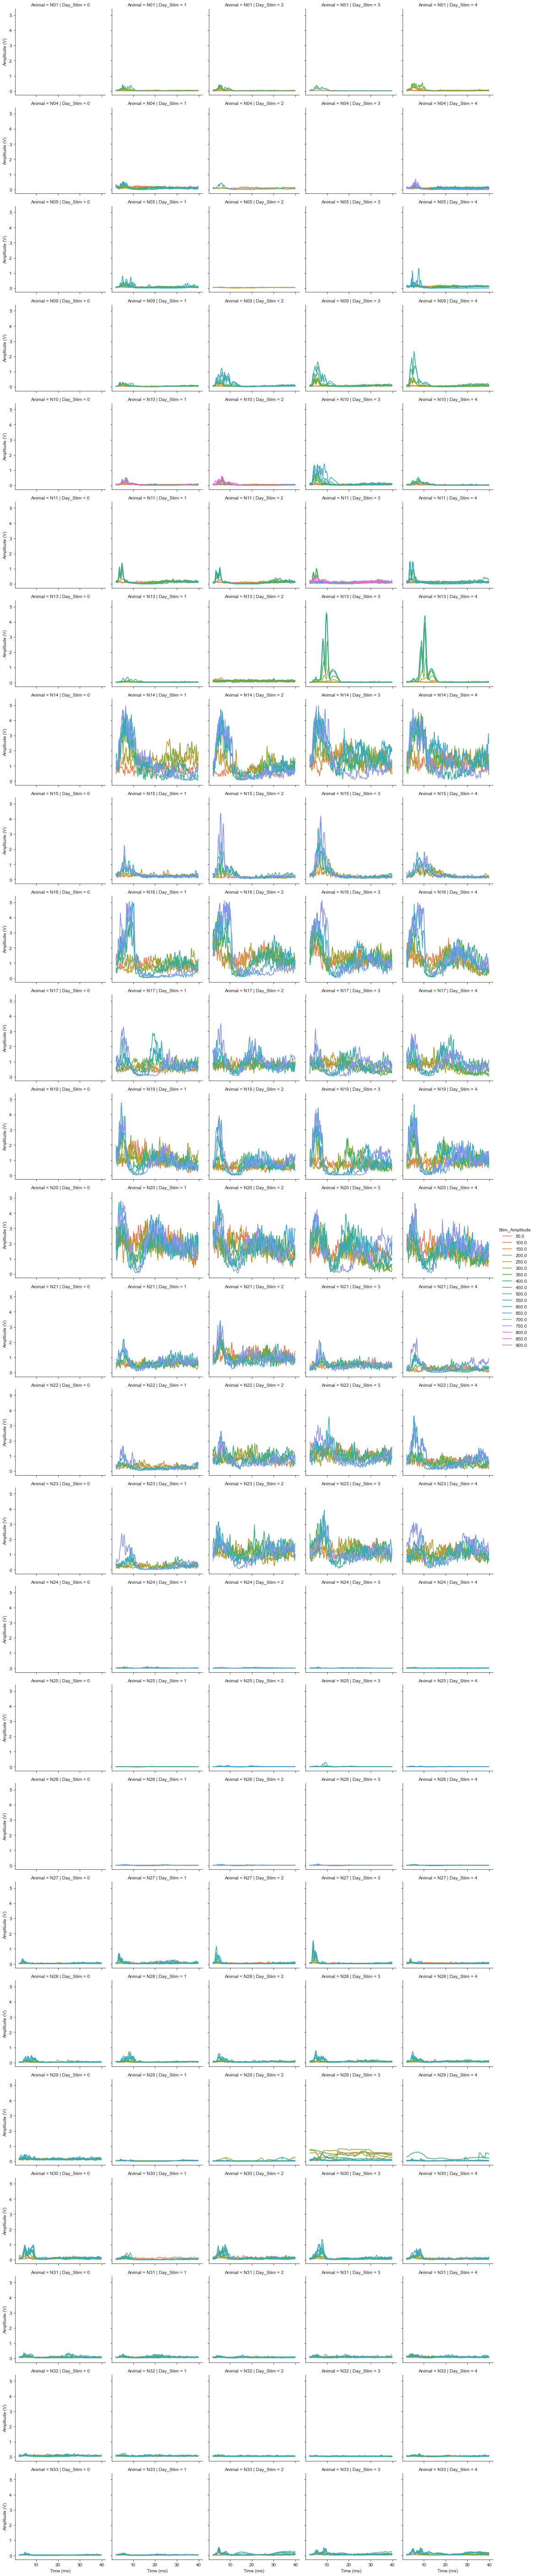

In [48]:
g = sns.FacetGrid(df_sta_sub_noart, col='Day_Stim', row='Animal', hue='Stim_Amplitude')
g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude')
g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
g.add_legend()
# plt.savefig('C:\\Users\\Ian\\Downloads\\STA_plots_norm_no_artifact.pdf')

### Calculate area under the stimulus triggered average curves 
##### For each current amplitude, each animal, and each day

In [10]:
#### KEEP THIS. MAY BIN IN FUTURE
# bins = [0.001, 0.004, 0.007, 0.010, 0.013, 0.0298] # define bins
# labels = ['1 to 4 ms', '4 to 7 ms', '7 to 10 ms', '10 to 13 ms', '13 to 29.8 ms'] # define bin labels
# #labels = [1, 2, 3, 4, 5]

# df_bin = df_sta_sub_norm.copy()
# df_bin['Time_Bin'] = pd.cut(df_bin['Time'], bins, labels=labels, right=False) # add Time_Bin column to dataframe
# df_bin = df_bin.reindex(columns=['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Sample', 'Time', 'Time_Bin', 'STA_Scaled'])
# df_bin.rename(columns = {'Time_Bin':'Bin'}, inplace = True) 
# df_bin = df_bin[df_bin['Bin'] != '13 to 29.8 ms'] # drop all data 13 ms after the stimulation
# df_bin.head()

In [11]:
df_noisefloor = df_sta_noart.copy()
df_noisefloor = df_noisefloor[(df_noisefloor['Time'] > 20.0)]
df_noisefloor.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Sample,STA_Amplitude,Time
101,N01,999,1,Left,10.0,101,0.026517,20.2
102,N01,999,1,Left,10.0,102,0.020794,20.4
103,N01,999,1,Left,10.0,103,0.022700,20.6
104,N01,999,1,Left,10.0,104,0.028331,20.8
105,N01,999,1,Left,10.0,105,0.031767,21.0


In [56]:
df_auc = df_sta_noart.copy()
df_auc = df_auc[(df_auc['Time'] > 2.0) & (df_auc['Time'] < 10.2)]
df_auc.tail()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Sample,STA_Amplitude,Time
1694846,N33,6,4,Left,600.0,46,0.190707,9.2
1694847,N33,6,4,Left,600.0,47,0.152887,9.4
1694848,N33,6,4,Left,600.0,48,0.123473,9.6
1694849,N33,6,4,Left,600.0,49,0.102801,9.8
1694850,N33,6,4,Left,600.0,50,0.103474,10.0


In [57]:
import numpy as np
# define animal groups
injstim = ['N09','N10','N11','N13','N27','N28','N29','N30']
noinjstim = ['N01','N04','N05','N31','N32','N33','N34','N35'] 
injnostim = ['N14','N15','N16','N21','N22','N23','N36','N37']
noinjnostim = ['N17','N19','N20','N24','N25','N26','N38','N39'] 

# add animal group information to the dataframe
conditions = [
    (df_auc['Animal'].isin(injstim) ),
    (df_auc['Animal'].isin(noinjstim) ),
    (df_auc['Animal'].isin(injnostim) ),
    (df_auc['Animal'].isin(noinjnostim) )]
choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']
df_auc['Group'] = np.select(conditions, choices)
df_auc.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Sample,STA_Amplitude,Time,Group
11,N01,999,1,Left,10.0,11,0.026453,2.2,No Injury and Stimulation
12,N01,999,1,Left,10.0,12,0.027991,2.4,No Injury and Stimulation
13,N01,999,1,Left,10.0,13,0.027984,2.6,No Injury and Stimulation
14,N01,999,1,Left,10.0,14,0.026587,2.8,No Injury and Stimulation
15,N01,999,1,Left,10.0,15,0.027326,3.0,No Injury and Stimulation


In [14]:
df_noisefloor_peak = df_noisefloor.copy()
df_noisefloor_peak = df_noisefloor_peak.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude'])['STA_Amplitude'].agg('mean').reset_index()
df_noisefloor_peak = df_noisefloor_peak.rename(columns={"STA_Amplitude": "STA_Noise_Floor"})
df_noisefloor_peak.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,STA_Noise_Floor
0,N01,999,1,Left,10.0,0.027038
1,N01,999,1,Left,20.0,0.022429
2,N01,999,1,Left,30.0,0.021366
3,N01,999,1,Left,40.0,0.019737
4,N01,999,1,Left,50.0,0.031949


In [15]:
df_noisefloor = df_noisefloor.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude'])['STA_Amplitude'].agg('mean').reset_index()
df_noisefloor['STA_Amplitude'] = df_noisefloor['STA_Amplitude'] * 7.8 # 7.8 because the length of the STA is 7.8 ms
df_noisefloor = df_noisefloor.rename(columns={"STA_Amplitude": "STA_Noise_Floor"})
df_noisefloor.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,STA_Noise_Floor
0,N01,999,1,Left,10.0,0.210894
1,N01,999,1,Left,20.0,0.174942
2,N01,999,1,Left,30.0,0.166652
3,N01,999,1,Left,40.0,0.153945
4,N01,999,1,Left,50.0,0.249201


In [58]:
df_peak = df_auc.copy()
df_peak = df_peak.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude', 'Group'])['STA_Amplitude'].agg('max').reset_index()
df_peak.rename(columns = {'STA_Amplitude':'STA_Peak'}, inplace = True)
df_peak = df_peak.drop(columns=['Day_Postop', 'Side'])
df_peak.head()

,Animal,Day_Stim,Stim_Amplitude,Group,STA_Peak
0,N01,1,10.0,No Injury and Stimulation,0.042865
1,N01,1,20.0,No Injury and Stimulation,0.042906
2,N01,1,30.0,No Injury and Stimulation,0.036920
3,N01,1,40.0,No Injury and Stimulation,0.063588
4,N01,1,50.0,No Injury and Stimulation,0.073174


In [59]:
from scipy import integrate

df_auc = df_auc.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude', 'Group'])['STA_Amplitude'].apply(integrate.simps).reset_index()
df_auc.rename(columns = {'STA_Amplitude':'STA_AUC'}, inplace = True)
df_auc = df_auc.drop(columns=['Day_Postop', 'Side'])
df_auc.head()

,Animal,Day_Stim,Stim_Amplitude,Group,STA_AUC
0,N01,1,10.0,No Injury and Stimulation,1.040341
1,N01,1,20.0,No Injury and Stimulation,1.053330
2,N01,1,30.0,No Injury and Stimulation,1.025544
3,N01,1,40.0,No Injury and Stimulation,1.375108
4,N01,1,50.0,No Injury and Stimulation,1.515141


In [60]:
df_peak.to_csv('D:\\df_peak_raw.csv', index=False) 
df_auc.to_csv('D:\\df_auc_raw.csv', index=False) 

In [61]:
df_auc.head()

,Animal,Day_Stim,Stim_Amplitude,Group,STA_AUC
0,N01,1,10.0,No Injury and Stimulation,1.040341
1,N01,1,20.0,No Injury and Stimulation,1.053330
2,N01,1,30.0,No Injury and Stimulation,1.025544
3,N01,1,40.0,No Injury and Stimulation,1.375108
4,N01,1,50.0,No Injury and Stimulation,1.515141


In [68]:
df_mean = df_auc.copy()
df_mean = df_mean[(df_mean['Stim_Amplitude'] > 340) & (df_mean['Stim_Amplitude'] < 560)]
df_mean.groupby(['Animal'])['STA_AUC'].agg('mean')

Animal
N01      6.612558
N04      7.223845
N05      6.743715
N09     16.525762
N10      8.841047
N11     10.834508
N13     17.116521
N14    109.246819
N15     29.357914
N16     94.552603
N17     33.923633
N19     59.336378
N20     82.883641
N21     31.496678
N22     38.685244
N23     50.668181
N24      0.888198
N25      0.819247
N26      0.830313
N27      5.591022
N28      7.058324
N29      4.491817
N30     11.810828
N31      4.254124
N32      2.658903
N33      4.901846
Name: STA_AUC, dtype: float64

# Steps

1. For each animal at each stim amplitude on each day
    - calculate the area under the MEP curve (~8 ms of MEP)
    - calculate the noise floor (single average value of 20 ms of baseline noise)
    - calculate the area under 8 ms of that average noise floor
    - calculate the percent change from area under average noise floor to area under MEP curve
2. Take the average percent change

In [18]:
choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']

def injury(row):
    if (row['Group'] == 'Injury and Stimulation') | (row['Group'] == 'Injury and No Stimulation'):
        val = 1
    elif (row['Group'] == 'No Injury and Stimulation') | (row['Group'] == 'No Injury and No Stimulation'):
        val = 0
    else:
        val = -1
    return val

def stimulation(row):
    if (row['Group'] == 'Injury and Stimulation') | (row['Group'] == 'No Injury and Stimulation'):
        val = 1
    elif (row['Group'] == 'Injury and No Stimulation') | (row['Group'] == 'No Injury and No Stimulation'):
        val = 0
    else:
        val = -1
    return val

In [19]:
# percent change from noise floor to peak for each day

df_peak_change = df_peak.copy()
df_peak_change["STA_Noise_Floor"] = df_noisefloor_peak["STA_Noise_Floor"]
df_peak_change['STA_Percent_Noise_Floor'] = ((df_peak_change['STA_Peak'].sub(df_peak_change["STA_Noise_Floor"])).div(df_peak_change["STA_Noise_Floor"])).mul(100)
df_peak_change.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Group,STA_Peak,STA_Noise_Floor,STA_Percent_Noise_Floor
0,N01,999,1,Left,10.0,No Injury and Stimulation,0.042865,0.027038,58.538890
1,N01,999,1,Left,20.0,No Injury and Stimulation,0.042906,0.022429,91.302731
2,N01,999,1,Left,30.0,No Injury and Stimulation,0.036920,0.021366,72.800185
3,N01,999,1,Left,40.0,No Injury and Stimulation,0.063588,0.019737,222.182643
4,N01,999,1,Left,50.0,No Injury and Stimulation,0.073174,0.031949,129.034625


In [20]:
df_peak_change['Injury'] = df_peak_change.apply(injury, axis=1)
df_peak_change['Stimulation'] = df_peak_change.apply(stimulation, axis=1)
#df_peak_change.head(50)
#df_abstract.groupby(['Group'])['STA_Percent_Noise_Floor'].agg(['mean','sem']).reset_index()


In [21]:
df_peak_change = df_peak_change.drop(columns=['Day_Postop', 'Side', 'STA_Peak', 'STA_Noise_Floor'])


In [22]:
df_peak_change.rename(columns = {'STA_Percent_Noise_Floor':'Peak_Percent_Noise_Floor'}, inplace = True) 

df_peak_change.head()

,Animal,Day_Stim,Stim_Amplitude,Group,Peak_Percent_Noise_Floor,Injury,Stimulation
0,N01,1,10.0,No Injury and Stimulation,58.538890,0,1
1,N01,1,20.0,No Injury and Stimulation,91.302731,0,1
2,N01,1,30.0,No Injury and Stimulation,72.800185,0,1
3,N01,1,40.0,No Injury and Stimulation,222.182643,0,1
4,N01,1,50.0,No Injury and Stimulation,129.034625,0,1


In [23]:
df_mean_day_peak_change = df_peak_change.copy()
df_mean_day_peak_change = df_mean_day_peak_change.groupby(['Day_Stim', 'Stim_Amplitude', 'Group'])['Peak_Percent_Noise_Floor'].agg('mean').reset_index()
df_mean_day_peak_change = df_mean_day_peak_change.rename(columns={'Peak_Percent_Noise_Floor':'Mean_Peak_Percent_Noise_Floor'})
df_mean_day_peak_change.head()

,Day_Stim,Stim_Amplitude,Group,Mean_Peak_Percent_Noise_Floor
0,0,100.0,Injury and Stimulation,82.649056
1,0,100.0,No Injury and Stimulation,98.146122
2,0,110.0,Injury and Stimulation,76.879589
3,0,110.0,No Injury and Stimulation,82.874806
4,0,120.0,Injury and Stimulation,51.435834


<Figure size 1440x1440 with 0 Axes>

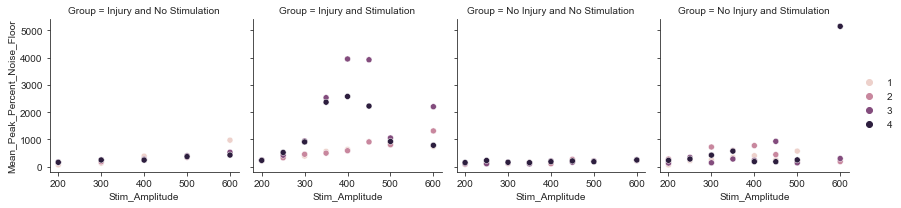

In [47]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500, 600]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
# sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_mean_day_peak_change[(df_mean_day_peak_change['Stim_Amplitude'].isin(stim_amp_list)) & (df_mean_day_peak_change['Day_Stim']>0)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "Mean_Peak_Percent_Noise_Floor", 'Day_Stim').add_legend())


In [70]:
# percent change from noise floor to auc for each day

df_day_pchange = df_auc.copy()
df_day_pchange["STA_Noise_Floor"] = df_noisefloor["STA_Noise_Floor"]
df_day_pchange['STA_Percent_Noise_Floor'] = ((df_day_pchange['STA_AUC'].sub(df_day_pchange["STA_Noise_Floor"])).div(df_day_pchange["STA_Noise_Floor"])).mul(100)
df_day_pchange.head()

,Animal,Day_Stim,Stim_Amplitude,Group,STA_AUC,STA_Noise_Floor,STA_Percent_Noise_Floor
0,N01,1,10.0,No Injury and Stimulation,1.040341,0.210894,393.301469
1,N01,1,20.0,No Injury and Stimulation,1.053330,0.174942,502.100974
2,N01,1,30.0,No Injury and Stimulation,1.025544,0.166652,515.380948
3,N01,1,40.0,No Injury and Stimulation,1.375108,0.153945,793.246078
4,N01,1,50.0,No Injury and Stimulation,1.515141,0.249201,508.000257


In [74]:
df_practice = df_day_pchange.groupby(['Animal', 'Day_Stim'])['STA_Percent_Noise_Floor'].agg('mean').reset_index()
df_practice.head()

,Animal,Day_Stim,STA_Percent_Noise_Floor
0,N01,1,1270.973975
1,N01,2,1834.307295
2,N01,3,2407.219854
3,N01,4,1800.637142
4,N04,1,803.819268


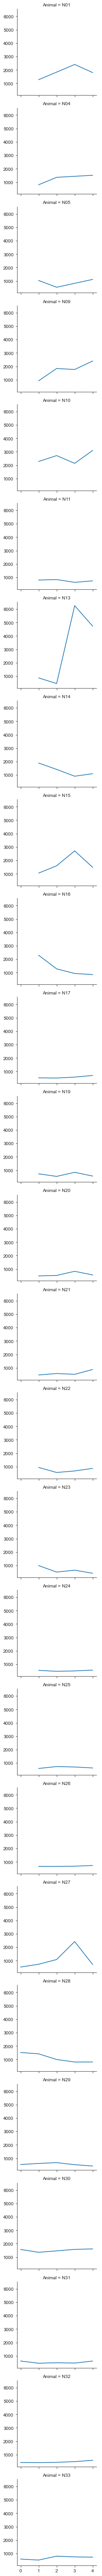

In [76]:
g = sns.FacetGrid(df_practice, row='Animal')
g.map_dataframe(sns.lineplot, x='Day_Stim', y='STA_Percent_Noise_Floor')
g.add_legend()
plt.savefig('D:\\visual_check.pdf')

In [26]:
df_day_pchange['Injury'] = df_day_pchange.apply(injury, axis=1)
df_day_pchange['Stimulation'] = df_day_pchange.apply(stimulation, axis=1)
#df_day_pchange = df_day_pchange.drop(columns=['Day_Postop', 'Side', 'STA_AUC', 'STA_Noise_Floor'])
#df_day_pchange.to_csv('D:\\df_abstract.csv', index=False) 
# df_day_pchange.head(50)
df_day_pchange = df_day_pchange.drop(columns=['Day_Postop', 'Side', 'STA_AUC', 'STA_Noise_Floor'])
df_day_pchange.rename(columns = {'STA_Percent_Noise_Floor':'AUC_Percent_Noise_Floor'}, inplace = True) 

df_day_pchange.head()

,Animal,Day_Stim,Stim_Amplitude,Group,AUC_Percent_Noise_Floor,Injury,Stimulation
0,N01,1,10.0,No Injury and Stimulation,393.301469,0,1
1,N01,1,20.0,No Injury and Stimulation,502.100974,0,1
2,N01,1,30.0,No Injury and Stimulation,515.380948,0,1
3,N01,1,40.0,No Injury and Stimulation,793.246078,0,1
4,N01,1,50.0,No Injury and Stimulation,508.000257,0,1


In [27]:
df_peak_change.head()

,Animal,Day_Stim,Stim_Amplitude,Group,Peak_Percent_Noise_Floor,Injury,Stimulation
0,N01,1,10.0,No Injury and Stimulation,58.538890,0,1
1,N01,1,20.0,No Injury and Stimulation,91.302731,0,1
2,N01,1,30.0,No Injury and Stimulation,72.800185,0,1
3,N01,1,40.0,No Injury and Stimulation,222.182643,0,1
4,N01,1,50.0,No Injury and Stimulation,129.034625,0,1


In [28]:
df_peak_400 = df_peak_change.copy()
df_peak_day4 = df_peak_change.copy()
df_auc_400 = df_day_pchange.copy()
df_auc_day4 = df_day_pchange.copy()

df_peak_400 = df_peak_400[df_peak_400['Stim_Amplitude'] == 400]
df_peak_day4 = df_peak_day4[df_peak_day4['Day_Stim'] == 4]
df_auc_400 = df_auc_400[df_auc_400['Stim_Amplitude'] == 400]
df_auc_day4 = df_auc_day4[df_auc_day4['Day_Stim'] == 4]

In [29]:
df_peak_400.to_csv('D:\\df_peak_400.csv', index=False) 
df_peak_day4.to_csv('D:\\df_peak_day4.csv', index=False) 
df_auc_400.to_csv('D:\\df_auc_400.csv', index=False) 
df_auc_day4.to_csv('D:\\df_auc_day4.csv', index=False) 


In [30]:
df_peak_400_day4 = df_peak_400.copy()
df_peak_400_day4 = df_peak_400_day4[df_peak_400_day4['Day_Stim'] == 4]

df_auc_400_day4 = df_auc_400.copy()
df_auc_400_day4 = df_auc_400_day4[df_auc_400_day4['Day_Stim'] == 4]

df_peak_400_day4.to_csv('D:\\df_peak_400_day4.csv', index=False) 
df_auc_400_day4.to_csv('D:\\df_auc_400_day4.csv', index=False) 

In [46]:
df_auc = df_day_pchange.copy()
df_peak = df_peak_change.copy()
df_auc.to_csv('D:\\df_auc.csv', index=False) 
df_peak.to_csv('D:\\df_peak.csv', index=False) 

In [32]:
df_mean_day_auc_change = df_day_pchange.copy()
df_mean_day_auc_change = df_mean_day_auc_change.groupby(['Day_Stim', 'Stim_Amplitude', 'Group'])['STA_Percent_Noise_Floor'].agg('mean').reset_index()
df_mean_day_auc_change = df_mean_day_auc_change.rename(columns={'STA_Percent_Noise_Floor':'Mean_STA_Percent_Noise_Floor'})
df_mean_day_auc_change.head()

KeyError: 'Column not found: STA_Percent_Noise_Floor'

In [ ]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500]

plt.figure(figsize=(20,20))
# sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_mean_day_auc_change[(df_mean_day_auc_change['Stim_Amplitude'].isin(stim_amp_list)) & (df_mean_day_auc_change['Day_Stim']>0)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "Mean_STA_Percent_Noise_Floor", 'Day_Stim').add_legend())


In [40]:
df_abstract_auc = df_day_pchange.copy()


df_abstract_auc = df_abstract_auc[(df_abstract_auc['Stim_Amplitude'] == 400) & (df_abstract_auc['Day_Stim'] == 4)]
#df_abstract = df_abstract.drop(columns=['Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude', 'STA_AUC', 'STA_Noise_Floor'])

df_abstract.head()


,Animal,Day_Stim,Stim_Amplitude,Group,AUC_Percent_Noise_Floor,Injury,Stimulation
250,N04,4,400.0,No Injury and Stimulation,601.043130,0,1
391,N05,4,400.0,No Injury and Stimulation,547.796721,0,1
608,N09,4,400.0,Injury and Stimulation,2582.405302,1,1
899,N10,4,400.0,Injury and Stimulation,6796.279432,1,1
1148,N11,4,400.0,Injury and Stimulation,1990.076663,1,1


In [ ]:
df_abstract['Injury'] = df_abstract.apply(injury, axis=1)
df_abstract['Stimulation'] = df_abstract.apply(stimulation, axis=1)
#df_abstract.head(50)
df_abstract.groupby(['Group'])['STA_Percent_Noise_Floor'].agg(['mean','sem']).reset_index()


In [ ]:
df_abstract.head()

In [ ]:
# make binary injury and binary stim variable
# take only day 4 at 400 ua
# two way anova
# post hoc pairwise twst

model = ols('STA_Percent_Noise_Floor ~ Group', data=df_abstract).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

In [ ]:
import scikit_posthocs as sp

sp.posthoc_tukey(df_abstract, val_col='STA_Percent_Noise_Floor', group_col='Group', p_adjust='holm')


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_stats = df_day_pchange.copy()
#df_stats['lmg'] = 1

model = smf.mixedlm("STA_Percent_Noise_Floor ~ Day_Stim + Stim_Amplitude + Group",
                    df_stats,
                    groups=df_stats["Animal"])
mdf = model.fit()
print(mdf.summary())




# model = ols('STA_Percent_Noise_Floor ~ C(Group) + Day_Stim + Stim_Amplitude', data=df_anova).fit()
# aov3 = sm.stats.anova_lm(model, type=1)
# print(aov3)

# aovrm3way = AnovaRM(df_anova,
#                              'STA_Percent_Noise_Floor',
#                              'Animal',
#                              within=['Group', 'Day_Stim', 'Stim_Amplitude'])
# res3way = aovrm3way.fit()
# print(res3way)

# three way REPEATED MEASURES anova and post hoc interactions analysis
    # group, day, stim amp
# post hoc pairwise comparisons after anova to look for significant differences at specific values

In [ ]:
df_stats.head()

In [ ]:
df_t = df_stats.copy()
df_t = df_t[df_t['Stim_Amplitude'] % 50 == 0]


In [ ]:
import scikit_posthocs as sp

sp.posthoc_ttest(df_t, val_col='STA_Percent_Noise_Floor', group_col='Group', p_adjust='bonf')


In [ ]:
# df_anova = df_day_pchange.copy()
# df_anova = df_anova[df_anova[]]
df_mean_sem = df_day_pchange.groupby(['Group', 'Day_Stim'])['STA_Percent_Noise_Floor'].agg(['mean','sem']).reset_index()
df_mean_sem.rename(columns={'mean':'Mean Percent Change AUC from Noise Floor', 'Day_Stim':'Days of Stimulation'}, inplace=True)
df_mean_sem.head(20)

In [ ]:
# g=sns.FacetGrid(df_mean_sem[df_mean_sem['Day_Stim'] > 0], col='Group')
# g= g.map(sns.scatterplot, 'Day_Stim', 'mean')


def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, **kwargs)

g=sns.FacetGrid(df_mean_sem[df_mean_sem['Days of Stimulation'] > 0], col='Group')
g.map_dataframe(errplot, "Days of Stimulation", "Mean Percent Change AUC from Noise Floor", "sem")

In [ ]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500]

# sns.set(rc={'figure.figsize':(80,40)})
# sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_day_pchange[(df_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_day_pchange['Day_Stim'] > 0)],
                  row="Group",
                  height=10,
                  aspect=1,
                  palette=sns.color_palette('coolwarm', n_colors=5))
g = g.map(sns.barplot,
          "Stim_Amplitude",
          "STA_Percent_Noise_Floor",
          'Day_Stim')

fig = g.fig
fig.savefig('D:\\fig.png') 

# sns.barplot(x="Stim_Amplitude",
#             y="STA_Percent_Noise_Floor",
#             hue='Day_Stim',
#             data=df_day_pchange[(df_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_day_pchange['Day_Stim'] > 0)])

# ax = sns.boxplot(x='Stim_Amplitude',
#                  y='STA_Percent_Noise_Floor',
#                  hue='Group',
#                  data=df_day_pchange[(df_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_day_pchange['Day_Stim'] == 4)])
# ax.legend(loc="upper left",
#           title='Stimulation Amplitude (uA)',
#           title_fontsize=16,
#           fontsize=15)


In [ ]:
df_mean_day_pchange = df_day_pchange.copy()
df_mean_day_pchange = df_mean_day_pchange.groupby(['Day_Stim', 'Stim_Amplitude', 'Group'])['STA_Percent_Noise_Floor'].agg('mean').reset_index()
df_mean_day_pchange = df_mean_day_pchange.rename(columns={'STA_Percent_Noise_Floor':'Mean_STA_Percent_Noise_Floor'})
df_mean_day_pchange.head()

In [ ]:
df_med_day_pchange = df_day_pchange.copy()
df_med_day_pchange = df_med_day_pchange.groupby(['Day_Stim', 'Stim_Amplitude', 'Group'])['STA_Percent_Noise_Floor'].median().reset_index()
df_med_day_pchange = df_med_day_pchange.rename(columns={'STA_Percent_Noise_Floor':'Med_STA_Percent_Noise_Floor'})
df_med_day_pchange.head()

In [ ]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500]

plt.figure(figsize=(20,20))
# sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_mean_day_pchange[(df_mean_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_mean_day_pchange['Day_Stim']>0)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "Mean_STA_Percent_Noise_Floor", 'Day_Stim').add_legend())
g.fig.suptitle('Mean', fontsize=16)



# ax = sns.boxplot(x='Stim_Amplitude', y='STA_Percent_Noise_Floor', hue='Group', data=df_day_pchange[(df_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_day_pchange['Day_Stim'] == 4)])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize=16, fontsize=15)


In [ ]:

df_mean_day_pchange = df_mean_day_pchange[(df_mean_day_pchange['Stim_Amplitude'] == 400) & (df_mean_day_pchange['Day_Stim'] == 4)]
sns.set_style("ticks")
g = sns.FacetGrid(df_mean_day_pchange[(df_mean_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_mean_day_pchange['Day_Stim']>0)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "Mean_STA_Percent_Noise_Floor", 'Day_Stim').add_legend())
g.fig.suptitle('Mean', fontsize=16)

In [ ]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500]

plt.figure(figsize=(20,20))
# sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_med_day_pchange[(df_med_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_med_day_pchange['Day_Stim']>0)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "Med_STA_Percent_Noise_Floor", 'Day_Stim').add_legend())
g.fig.suptitle('Median', fontsize=16)



# ax = sns.boxplot(x='Stim_Amplitude', y='STA_Percent_Noise_Floor', hue='Group', data=df_day_pchange[(df_day_pchange['Stim_Amplitude'].isin(stim_amp_list)) & (df_day_pchange['Day_Stim'] == 4)])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize=16, fontsize=15)


In [ ]:
# add STA_AUC_Baseline to df_auc
df_auc["STA_Noise_Floor"] = df_noisefloor["STA_Noise_Floor"]
df_auc["STA_AUC_Difference"] = df_auc["STA_AUC"].sub(df_noisefloor["STA_Noise_Floor"])
df_auc.head()

In [ ]:
import numpy as np
# define animal groups
injstim = ['N09','N10','N11','N13','N27','N28','N29','N30']
noinjstim = ['N01','N04','N05','N31','N32','N33','N34','N35'] 
injnostim = ['N14','N15','N16','N21','N22','N23','N36','N37']
noinjnostim = ['N17','N19','N20','N24','N25','N26','N38','N39'] 

# add animal group information to the dataframe
conditions = [
    (df_auc['Animal'].isin(injstim) ),
    (df_auc['Animal'].isin(noinjstim) ),
    (df_auc['Animal'].isin(injnostim) ),
    (df_auc['Animal'].isin(noinjnostim) )]
choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']
df_auc['Group'] = np.select(conditions, choices)
df_auc.head()

In [ ]:
df_pchange = df_auc.copy()
df_pchange = df_pchange.pivot_table(index=['Animal', 'Stim_Amplitude', 'Group'], 
                    columns='Day_Stim', 
                    values='STA_AUC').reset_index()
df_pchange.head()

In [ ]:
df_pchange["Percent Change AUC Day 1 to Day 4"] = ((df_pchange[4].sub(df_pchange[1])).div(df_pchange[1])).mul(100)
df_pchange["Percent Change AUC Day 1 to Day 3"] = ((df_pchange[3].sub(df_pchange[1])).div(df_pchange[1])).mul(100)
df_pchange["Percent Change AUC Day 1 to Day 2"] = ((df_pchange[2].sub(df_pchange[1])).div(df_pchange[1])).mul(100)

df_pchange.rename(columns = {'Stim_Amplitude':'Stimulation Amplitude'}, inplace = True) 


In [ ]:
df_pchange.loc[df_pchange['Animal'] == 'N14']

In [ ]:
# df_plot = df_pchange.groupby(['Stimulation Amplitude', 'Group'])['Percent Change AUC Day 1 to Day 4'].agg('mean').reset_index()
# df_plot.head()

In [ ]:
# df_inj_stim = df_pchange.copy()
# df_inj_stim = df_inj_stim[df_inj_stim['Group'] == "Injury and Stimulation"]
# df_inj_stim.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)

ax = sns.scatterplot(x='Stimulation Amplitude', y='Percent Change AUC Day 1 to Day 4', hue='Animal', data=df_pchange)
#ax.set_ylabel('Mean Percent Change STA AUC Day 1 to Day 4')
#plt.savefig('C:\\Users\\iangm\\Downloads\\PLOT.pdf')

# plt.figure(figsize=(20,12))
# sns.set(font_scale=2)
# sns.set_style("ticks")
# ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
# ax.set_title(project + ': Percent Change AUC ' + day_range)
# ax.set_ylabel('Percent Change STA AUC')

In [ ]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500]

plt.figure(figsize=(20,12))
# sns.set(font_scale=2)
sns.set_style("ticks")
ax = sns.boxplot(x='Group', y='Percent Change AUC Day 1 to Day 4', hue='Stimulation Amplitude', data=df_pchange[df_pchange['Stimulation Amplitude'] % 50 == 0])
ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize=16, fontsize=15)


# CODE BELOW THIS NEEDS TO BE INTEGRATED TO CODE ABOVE

###### Below is a plot showing the data we will be working with. Data are normalized and are cut off at 13 ms after the stimulus. Also, only stimulation amplitudes divisible by 50 are in this dataframe.

In [ ]:
# g = sns.FacetGrid(df_bin, col='Day', row='Animal', hue='Stim_Amplitude')
# g.map_dataframe(sns.lineplot, x='Time', y='STA_Scaled')
# g.set_axis_labels('12 ms duration', 'Ampltiude (V)')
# g.add_legend()

We now need to integrate the stimulus triggered average curves to find the area beneath them. We can then compare these areas under the curve (AUCs) between groups, days, stimulus intensities, etc.

The trapezoidal rule provides a simple way to integrate a function but typically has much larger error than Simpson's rule without saving significant compute time. We will use Simpson's rule.

In [ ]:
# from scipy import integrate

# df_auc = df_bin.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Bin'])['STA_Scaled'].apply(integrate.simps).reset_index()
# df_auc.rename(columns = {'STA_Scaled':'STA_AUC'}, inplace = True)
# df_auc = df_auc.dropna()
# df_auc.head()

### Rough work below

In [ ]:
# import numpy as np

# # add animal group information to the dataframe
# conditions = [
#     (df_auc['Animal'] == 'S01') | (df_auc['Animal'] == 'S02'),
#     (df_auc['Animal'] == 'S03') | (df_auc['Animal'] == 'S04'),
#     (df_auc['Animal'] == 'S05') | (df_auc['Animal'] == 'S06')]
# choices = ['Group A', 'Group B', 'Group C']
# df_auc['Group'] = np.select(conditions, choices)
# df_auc.head()

In [ ]:
# # function to calculate percent change
# def perc_change_from_d4(df, day):
#     return ((df[str(day)].sub(df['4'])).div(df['4'])).mul(100)

In [ ]:
# ### changed function above to take df arg

# df_auc_pchange = df_auc.pivot_table(index=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], 
#                     columns='Day', 
#                     values='STA_AUC').reset_index()

# for n in np.arange(6,20,2):
#     df_auc_pchange["Day 4 to Day %s" % n] = perc_change_from_d4(n)

# df_auc_pchange = df_auc_pchange.drop(df_auc_pchange.columns[5:13], axis=1)
# df_auc_pchange.head()

In [ ]:
# df_auc_pchange = pd.melt(df_auc_pchange, id_vars=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], var_name='Days', value_name='Percent_Change')
# df_auc_pchange.head()

In [ ]:
# df_auc_pchange[(df_auc_pchange['Group'] == 'Group C') & (df_auc_pchange['Days'] == 'Day 4 to Day 16') & (df_auc_pchange['Animal'] == 'S05')].head(50)

In [ ]:
# # all the bar plots
# sns.set(font_scale=1.5)
# g = sns.FacetGrid(df_auc_pchange, col="Days", row='Bin')
# g.map(sns.barplot, "Group", "Percent_Change", 'Stim_Amplitude')

In [ ]:
# day_range = 'Day 4 to Day 18'

# plt.figure(figsize=(20,12))
# sns.set(font_scale=2)
# sns.set_style("ticks")
# ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
# ax.set_title(project + ': Percent Change AUC ' + day_range)
# ax.set_ylabel('Percent Change STA AUC')

### Other analyses

- Peak to peak from stimulus triggered average for each current amplitude, each animal, each day
- Latency from stimulus pulse to stimulus triggered average for each current amplitude, each animal, each day
- Time domains of stimulus triggered average
- Differences in any of these parameters based on time of day?
- How are we going to present the impedance data in the Neilsen paper? I’m still not clear on this.
- Additional things we can look at (e.g., wavelet, FFT, HMM, etc.)
- Look in manuscript file for notes on ideas. Also look in Daily Notes on OneNote for papers that did EMG analysis well.
- Add information on time of day and stimulus amplitude from Neurochip